**NAME** : **TANYA** **KALE**
**PROJECT** **BATCH** : **DS2402**
**INTERNSHIP** **NO** : **2402**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DATA COLLECTION & PREPROCESSING

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#ABD1F3'

In [ ]:
data = pd.read_csv('/content/happiness_score_dataset.csv')

In [ ]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
data_columns = ['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity']

In [ ]:
data = data[data_columns].copy()

In [ ]:
happy_df = data.rename({'Country': 'country', 'Region': 'region', 'Happiness score': 'happiness_score', 'Economy': 'GDP', 'Family': 'family', 'Health': 'health', 'Freedom':'freedom','Trust': 'trust', 'Generosity': 'generosity'}, axis = 1)

In [ ]:
happy_df.head()

,country,region,Happiness Score,Economy (GDP per Capita),family,Health (Life Expectancy),freedom,Trust (Government Corruption),generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [ ]:
happy_df.isnull().sum()

country                          0
region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
family                           0
Health (Life Expectancy)         0
freedom                          0
Trust (Government Corruption)    0
generosity                       0
dtype: int64

DATA VISUALISATION WITH BARPLOT, SCATTERPLOT, PIE-CHART, SUBPLOT & HEATMAP

Text(0, 0.5, 'Economy(GDP per Capita)')

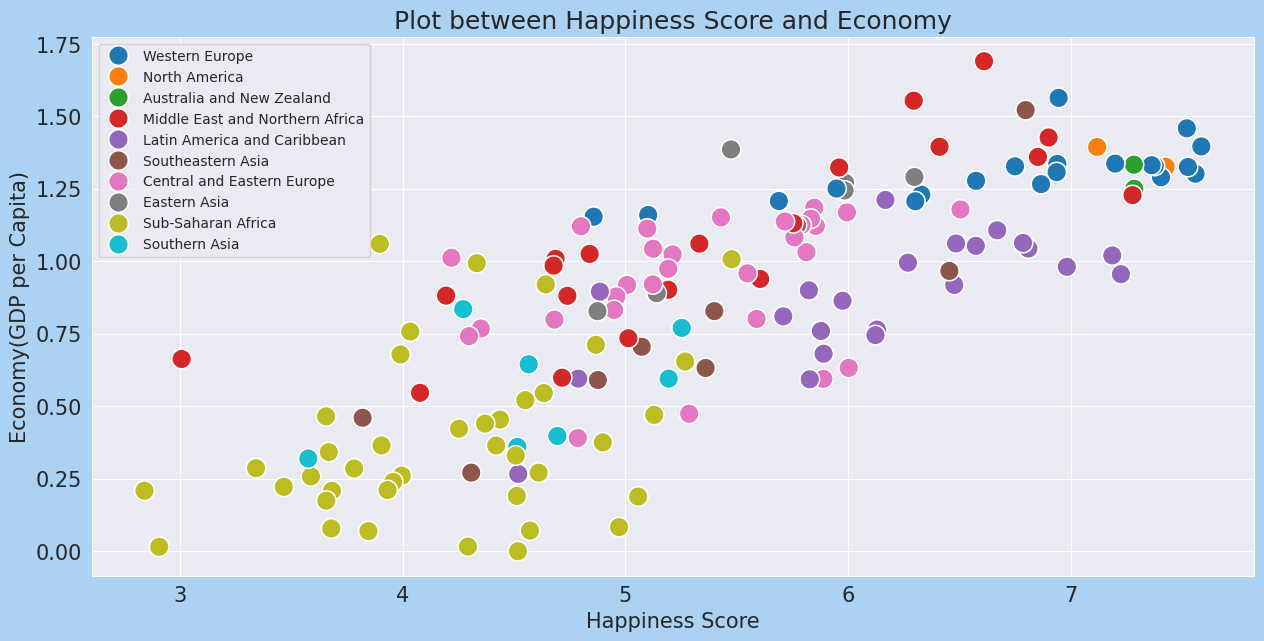

In [ ]:
# plot b/w happiness and Economy

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Happiness Score and Economy')
sns.scatterplot(x = happy_df['Happiness Score'], y = happy_df['Economy (GDP per Capita)'], hue = happy_df['region'], s=200)

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')

In [ ]:
economy_region = happy_df.groupby('region')['Economy (GDP per Capita)'].sum()
economy_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

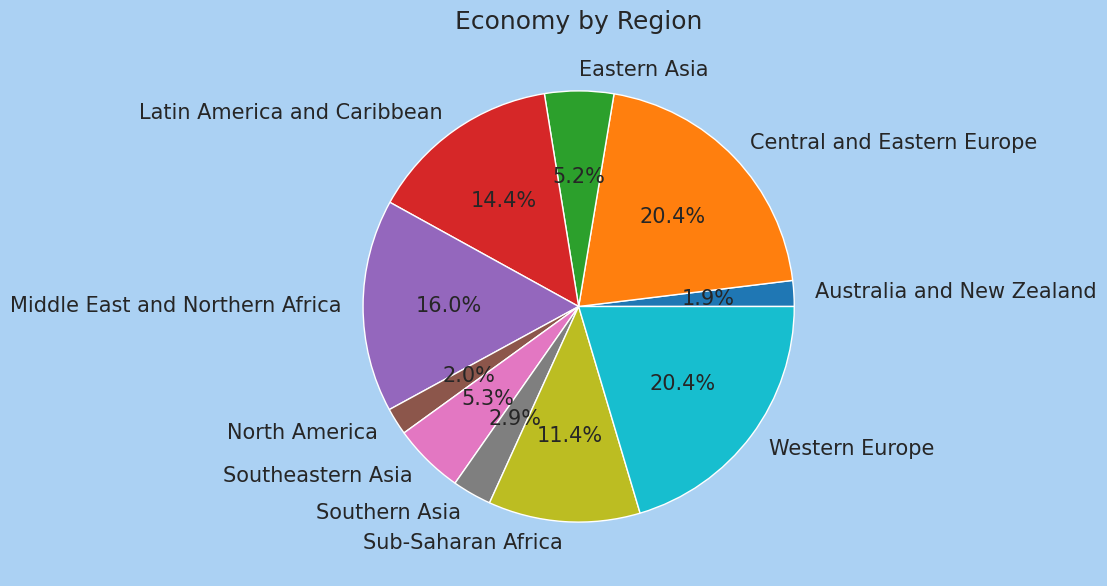

In [ ]:
economy_region.plot.pie(autopct = '%1.1f%%')
plt.title('Economy by Region')
plt.ylabel('')

In [ ]:
# total countries
total_country = happy_df.groupby('region')[['country']].count()
print(total_country)

                                 country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


CORRELATION

In [ ]:
print(happy_df.columns)

Index(['country', 'region', 'Happiness Score', 'Economy (GDP per Capita)',
       'family', 'Health (Life Expectancy)', 'freedom',
       'Trust (Government Corruption)', 'generosity'],
      dtype='object')


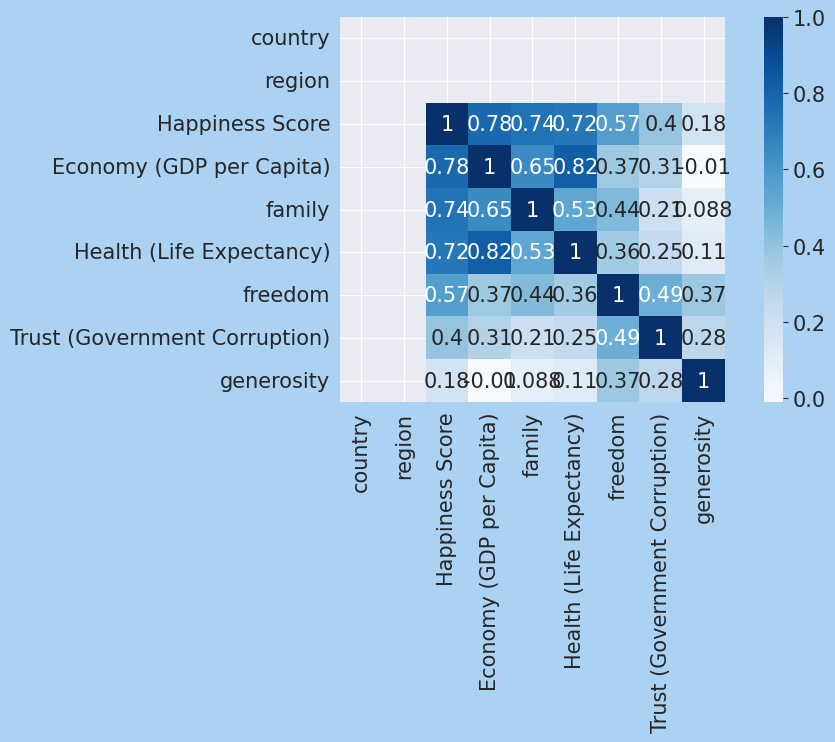

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert string values to numeric
happy_df_numeric = happy_df.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
cor = happy_df_numeric.corr(method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Create a heatmap
sns.heatmap(cor, annot=True, cmap="Blues", square=True)

plt.show()

In [ ]:
# trust in region
Trust_Government_Corruption = happy_df.groupby('region')[['Trust (Government Corruption)']].mean()
Trust_Government_Corruption

,Trust (Government Corruption)
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


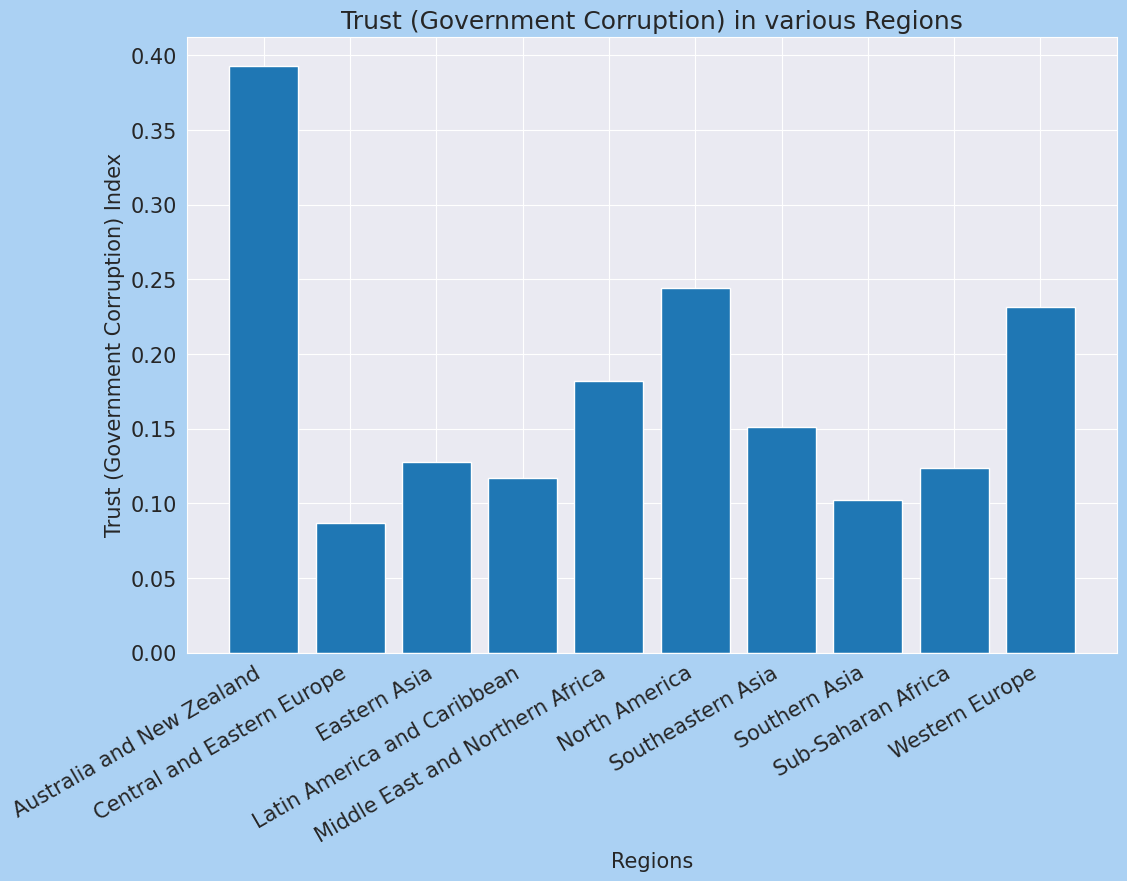

In [ ]:
# Change the variable name to avoid conflict with built-in function
Trust_Government_Corruption_data = happy_df.groupby('region')[['Trust (Government Corruption)']].mean()

plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Trust (Government Corruption) in various Regions')
plt.xlabel('Regions', fontsize=15)
plt.ylabel('Trust (Government Corruption) Index', fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.bar(Trust_Government_Corruption_data.index, Trust_Government_Corruption_data['Trust (Government Corruption)'])
plt.show()

In [ ]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

<ipython-input-33-8022ffbbfe82>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
<ipython-input-33-8022ffbbfe82>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


Text(827.8358585858584, 0.5, 'Health (Life Expectancy)')

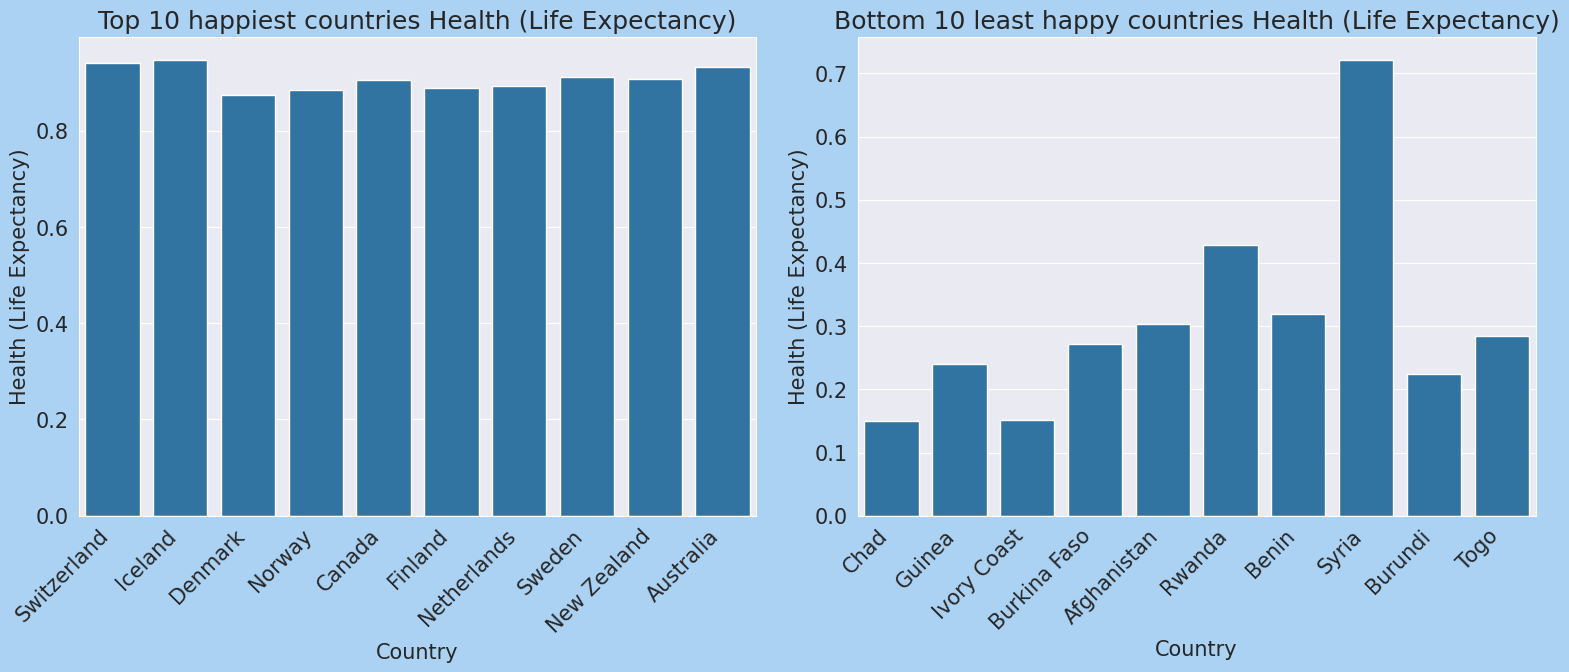

In [ ]:
fig, axes= plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad= 2)
xlabels= top_10.country
axes[0].set_title('Top 10 happiest countries Health (Life Expectancy)')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= top_10.country, y= top_10["Health (Life Expectancy)"], ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Health (Life Expectancy)')
xlabels = bottom_10.country
axes[1].set_title('Bottom 10 least happy countries Health (Life Expectancy)')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country, y=bottom_10['Health (Life Expectancy)'], ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Health (Life Expectancy)')

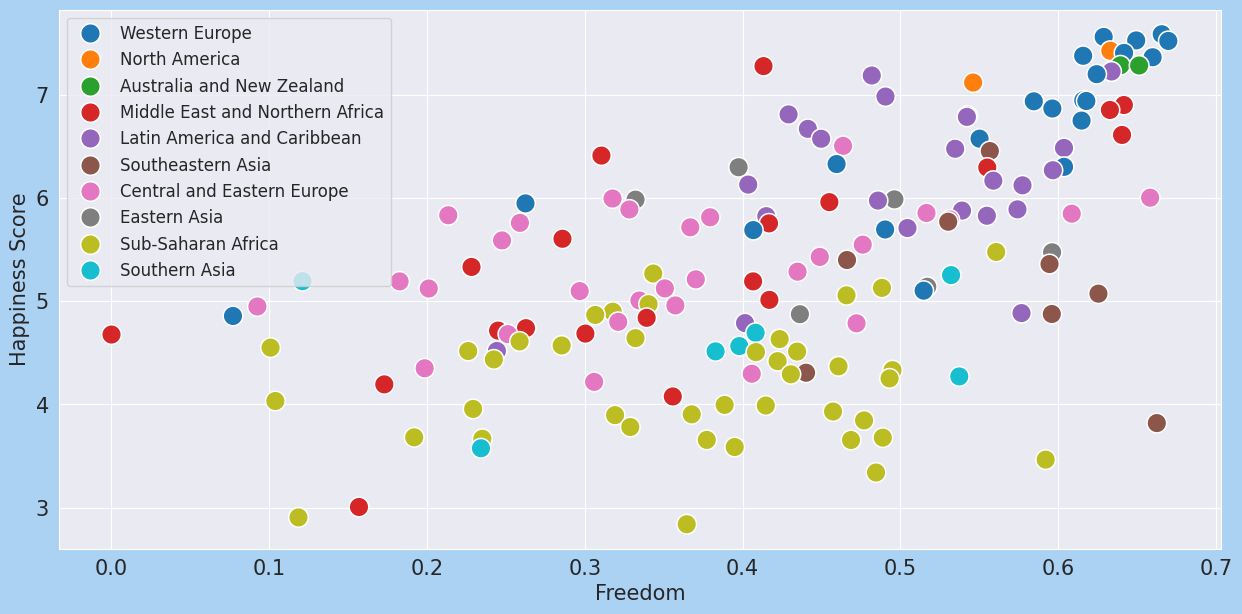

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happy_df["freedom"], y=happy_df["Happiness Score"], hue = happy_df["region"], s = 200)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

In [ ]:
# Define the variable 'country' using the sorted happy_df
country = happy_df.sort_values(by='Trust (Government Corruption)').head(10)

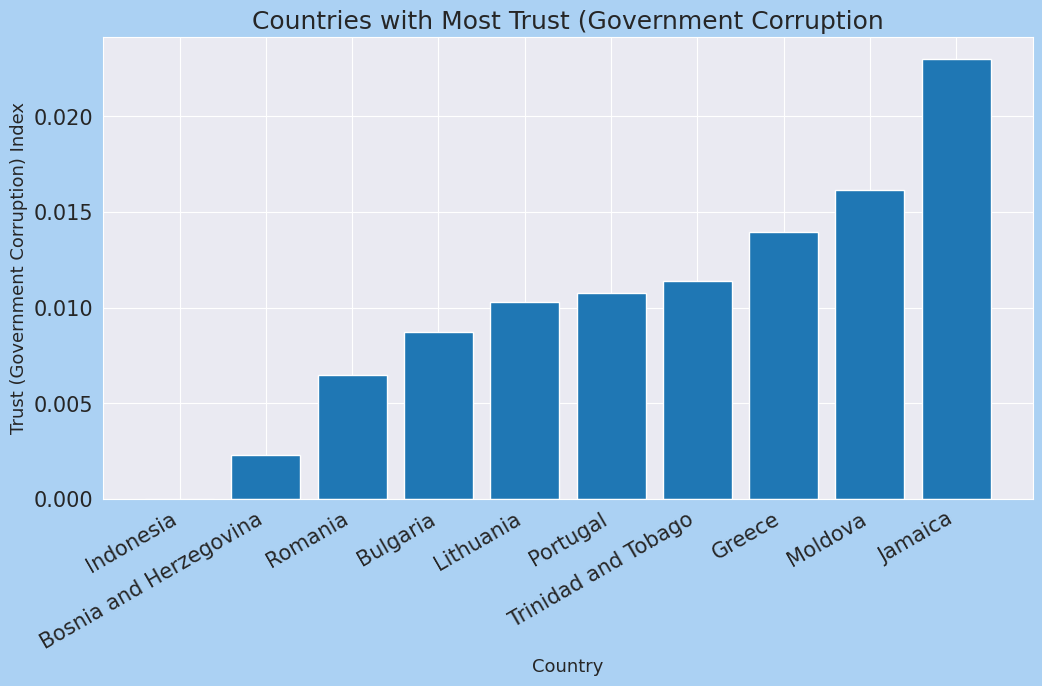

In [ ]:
def plot_most_trusted_countries(happy_df):
    # Sort happy_df by Trust (Government Corruption) and take the top 10
    country = happy_df.sort_values(by='Trust (Government Corruption)').head(10)

    # Plot the bar chart
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.title('Countries with Most Trust (Government Corruption')
    plt.xlabel('Country', fontsize=13)
    plt.ylabel('Trust (Government Corruption) Index', fontsize=13)
    plt.xticks(rotation=30, ha='right')
    plt.bar(country.country, country['Trust (Government Corruption)'])

# Call the function with happy_df as an argument
plot_most_trusted_countries(happy_df)

FINAL REPRESENTATION OF TRUST (GOVERNMENT CORRUPTION) & HAPPINESS

Text(0, 0.5, 'Happiness Score')

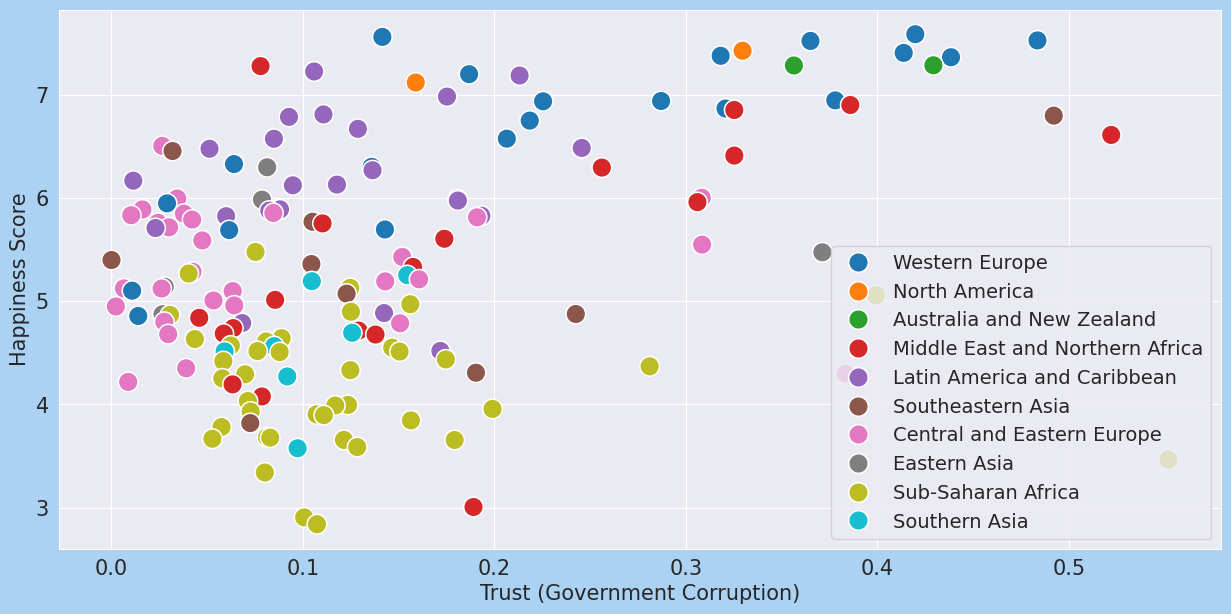

In [ ]:
 # corruption vs happiness
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = happy_df["Trust (Government Corruption)"], y=happy_df["Happiness Score"], hue=happy_df.region, s=200)
plt.legend(loc='lower right', fontsize='14')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')